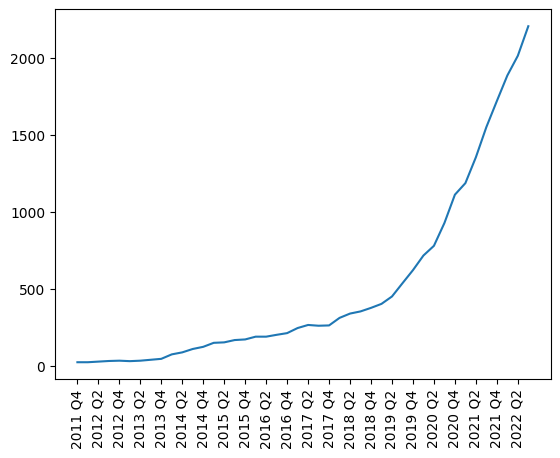

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# read table data
df = pd.read_excel('car registe.xlsx')
x = sorted(df.columns.tolist())
df = df[x]

# read column data
row_data = df.iloc[2, :-6].tolist()
Date = sorted(df.columns[:-6].tolist())
df1 = pd.DataFrame({'row_data': row_data})
df2 = pd.DataFrame({'Date': Date})
# df = pd.concat([df1, df2], axis=1)

plt.xticks(range(0, len(Date), 2), Date[::2], rotation=90)
plt.plot(Date,row_data)
plt.show()



Whether the traffic impact of the Covid-19 embargo can be used as an indicator to calculate the potential impact of universal access to electric vehicles and clean air zones

In [2]:
import pandas as pd


data = pd.read_excel('covid tran.xlsx')

# select 'column_name'，== 'target_value' 
filtered_data = data[data['Sector'] == 'transit stations']
# filtered_data = data[data['Sector'] == 'parks']

sorted_data = filtered_data.sort_values('Date')
sorted_data['Date'] = pd.to_datetime(sorted_data['Date'])

# group by quarter
sorted_data = sorted_data.groupby(pd.Grouper(key='Date', freq='Q')).mean()
# sorted_data = sorted_data.index.strftime('%Y-Q%q')
col2 = sorted_data['Percent change from baseline']

print(col2)


Date
2020-03-31   -21.456522
2020-06-30   -72.670330
2020-09-30   -52.184783
2020-12-31   -57.456522
2021-03-31   -69.566667
2021-06-30   -48.648352
2021-09-30   -40.673913
2021-12-31   -32.413043
2022-03-31   -38.488889
2022-06-30   -33.230769
2022-09-30   -31.032609
2022-12-31   -30.266667
Freq: Q-DEC, Name: Percent change from baseline, dtype: float64


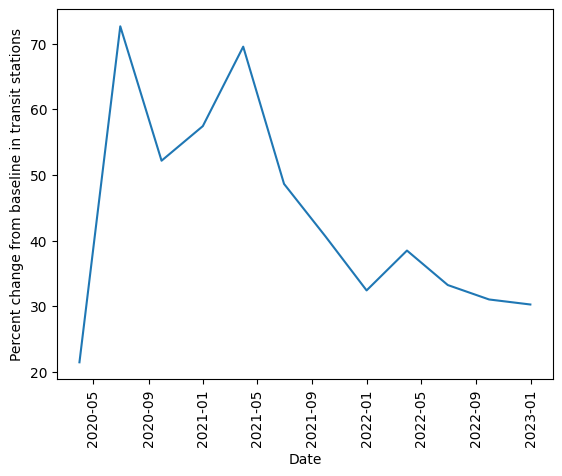

In [3]:
plt.xticks(rotation=90)
plt.plot(sorted_data.index,-col2)
plt.xlabel('Date')
plt.ylabel('Percent change from baseline in transit stations')
plt.show()

Determining the relationship between air quality and outbreak blockade

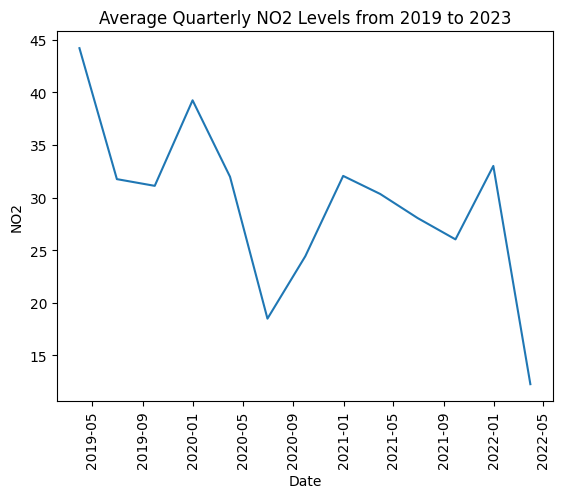

In [4]:
# Filter data by date range
#from date import dateforma

import pandas as pd
import matplotlib.pyplot as plt

# Load data from Excel file
df = pd.read_excel('air quality clean.xlsx')
# df = pd.DataFrame(df)
from datetime import datetime
start_date = pd.to_datetime('2019-01-01')
end_date = pd.to_datetime('2023-12-31')
dates = df['Date']
i = 0
x = []
for d in dates:
    x.append(str(d))
    i = i+1
df = df.loc[(pd.to_datetime(x) >=  pd.to_datetime(start_date, utc=True)) & (pd.to_datetime(x) <= pd.to_datetime(end_date,utc=True))]

#Group data by quarter and compute mean NO2 levels
df['Date'] = pd.to_datetime(df['Date'],utc=False)
df = df.groupby(pd.Grouper(key='Date', freq='Q')).mean()
# df.index
# Extract date and NO2 information
date = df.index
no2 = df['NO2']

# Sort data by date
date, no2 = zip(*sorted(zip(date, no2)))

# Plot the line chart
plt.xticks(rotation=90)
plt.plot(date, no2)
plt.xlabel('Date')
plt.ylabel('NO2')
plt.title('Average Quarterly NO2 Levels from 2019 to 2023')
plt.show()



C:\Users\admin\AppData\Local\Temp\ipykernel_9688\3453811946.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Date'] = pd.to_datetime(filtered_data['Date']).dt.tz_localize(None)


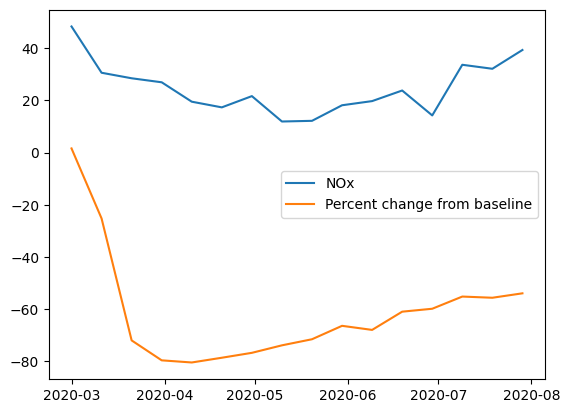

In [5]:
data = pd.read_excel('covid tran.xlsx')
df = pd.read_excel('air quality clean.xlsx')

filtered_data = data[data['Sector'] == 'transit stations']

from datetime import datetime
start_date = pd.to_datetime('2020-03-01')
end_date = pd.to_datetime('2020-08-01')
dates = df['Date']
i = 0
x = []
for d in dates:
    x.append(str(d))
    i = i+1
df = df.loc[(pd.to_datetime(x) >=  pd.to_datetime(start_date, utc=True)) & (pd.to_datetime(x) <= pd.to_datetime(end_date,utc=True))]
df['Date'] = pd.to_datetime(df['Date']).dt.tz_localize(None)
filtered_data['Date'] = pd.to_datetime(filtered_data['Date']).dt.tz_localize(None)
v1 = filtered_data
v2 = df

# Group the merged DataFrame by date and calculate the correlation between Variable1 and Variable2 for each date
merged_df = pd.merge(v1, v2, on='Date', how='inner')
merged_df['Date'] = pd.to_datetime(merged_df['Date'], format='%Y-%m-%d')
merged_df = merged_df.groupby(pd.Grouper(key='Date', freq='10D')).mean()
# merged_df.set_index('Date', inplace=True)

# plot MD
# plt.plot(-merged_df['NO2'], label='NO2')
plt.plot(merged_df['NOx'], label='NOx')
plt.plot(merged_df['Percent change from baseline'], label='Percent change from baseline')
plt.legend()
plt.show()

Focus on the overall time series

In [6]:
# 2020.3.23-8.23 first lockdown， 11-next year March is second lockdown
data = pd.read_excel('covid tran.xlsx')
# plot them in the same plot
# find the outliers

# select 'column_name'，== 'target_value'
filtered_data = data[data['Sector'] == 'transit stations']
# filtered_data = data[data['Sector'] == 'parks']

sorted_data = filtered_data.sort_values('Date')

df = pd.read_excel('air quality clean.xlsx')
# df = pd.DataFrame(df)
from datetime import datetime
start_date = pd.to_datetime('2020-03-01')
end_date = pd.to_datetime('2022-08-01')
dates = df['Date']
i = 0
x = []
for d in dates:
    x.append(str(d))
    i = i+1
df = df.loc[(pd.to_datetime(x) >=  pd.to_datetime(start_date, utc=True)) & (pd.to_datetime(x) <= pd.to_datetime(end_date,utc=True))]

#Group data by quarter and compute mean NO2 levels
df['Date'] = pd.to_datetime(df['Date']).dt.tz_localize(None)
filtered_data['Date'] = pd.to_datetime(filtered_data['Date']).dt.tz_localize(None)
v1 = filtered_data
v2 = df

# Group the merged DataFrame by date and calculate the correlation between Variable1 and Variable2 for each date
merged_df = pd.merge(v1, v2, on='Date', how='inner')
print(merged_df)
merged_df['Date'] = pd.to_datetime(merged_df['Date'], format='%Y-%m-%d')

           Date            Sector  Percent change from baseline  \
0    2020-03-09  transit stations                            -4   
1    2020-03-09  transit stations                            -4   
2    2020-03-09  transit stations                            -4   
3    2020-03-09  transit stations                            -4   
4    2020-03-09  transit stations                            -4   
...         ...               ...                           ...   
3031 2021-12-08  transit stations                           -36   
3032 2021-12-29  transit stations                           -57   
3033 2021-12-29  transit stations                           -57   
3034 2021-12-29  transit stations                           -57   
3035 2021-12-29  transit stations                           -57   

                      Date Time       NOx      NO2       NO  SiteID    PM10  \
0     2020-03-09T00:00:00+00:00    7.5878   5.5469   1.3310     452  16.425   
1     2020-03-09T00:00:00+00:00   23.

C:\Users\admin\AppData\Local\Temp\ipykernel_9688\1319954514.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Date'] = pd.to_datetime(filtered_data['Date']).dt.tz_localize(None)


In [7]:
#drop NA
merged_df = merged_df.groupby(pd.Grouper(key='Date', freq='15D')).mean()

merged_df.dropna(subset=['NOx'], inplace=True)
c1 = merged_df['NOx']
c2 = merged_df['Percent change from baseline']
corr = c1.corr(c2)
data_corr = { 'Percent change from baseline': c2,'NO2': merged_df['NO2'],'NOx':c1}
corr2 = pd.DataFrame(data_corr)
corr_2 = corr2.corr()
print(corr_2)

                              Percent change from baseline       NO2       NOx
Percent change from baseline                      1.000000  0.267749  0.254428
NO2                                               0.267749  1.000000  0.860303
NOx                                               0.254428  0.860303  1.000000


Whole dataset contain without lockdown period and lockdown period with out mean() calculation, and the figure shows loose correlation

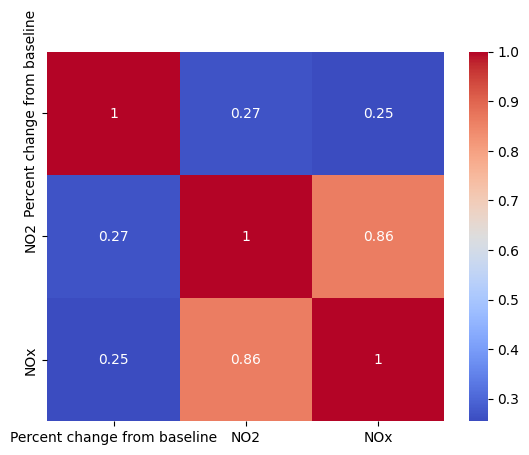

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(corr_2, annot=True, cmap='coolwarm')
plt.show()

Focus on the frist lockdown

                              Percent change from baseline       NO2       NOx
Percent change from baseline                      1.000000  0.625386  0.912497
NO2                                               0.625386  1.000000  0.746333
NOx                                               0.912497  0.746333  1.000000


C:\Users\admin\AppData\Local\Temp\ipykernel_9688\3209348354.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Date'] = pd.to_datetime(filtered_data['Date']).dt.tz_localize(None)


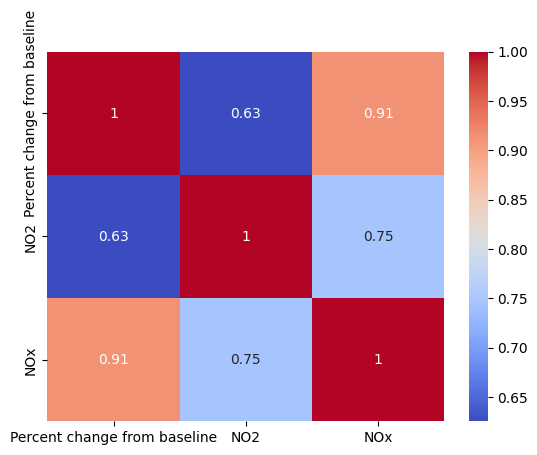

In [11]:
# 2020.3.23-8.23 first lockdown，
data = pd.read_excel('covid tran.xlsx')
# plot them in the same plot
# find the outliers

filtered_data = data[data['Sector'] == 'transit stations']
# filtered_data = data[data['Sector'] == 'parks']

sorted_data = filtered_data.sort_values('Date')

df = pd.read_excel('air quality clean.xlsx')
# df = pd.DataFrame(df)
from datetime import datetime
start_date = pd.to_datetime('2020-03-01')
end_date = pd.to_datetime('2020-08-01')
dates = df['Date']
i = 0
x = []
for d in dates:
    x.append(str(d))
    i = i+1
df = df.loc[(pd.to_datetime(x) >=  pd.to_datetime(start_date, utc=True)) & (pd.to_datetime(x) <= pd.to_datetime(end_date,utc=True))]

#Group data by quarter and compute mean NO2 levels
df['Date'] = pd.to_datetime(df['Date']).dt.tz_localize(None)
filtered_data['Date'] = pd.to_datetime(filtered_data['Date']).dt.tz_localize(None)
v1 = filtered_data
v2 = df

# Group the merged DataFrame by date and calculate the correlation between Variable1 and Variable2 for each date
merged_df = pd.merge(v1, v2, on='Date', how='inner')
merged_df['Date'] = pd.to_datetime(merged_df['Date'], format='%Y-%m-%d')
#drop NA and calculate mean()
merged_df = merged_df.groupby(pd.Grouper(key='Date', freq='M')).mean()
merged_df.dropna(subset=['NOx'], inplace=True)
c1 = merged_df['NOx']
c2 = merged_df['Percent change from baseline']
corr = c1.corr(c2)
data_corr = { 'Percent change from baseline': c2,'NO2': merged_df['NO2'],'NOx':c1}
corr2 = pd.DataFrame(data_corr)
corr_2 = corr2.corr()
print(corr_2)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(corr_2, annot=True, cmap='coolwarm')
plt.show()

Without lockdown period, the data shows low corralation

                              Percent change from baseline       NO2       NOx
Percent change from baseline                      1.000000  0.127421  0.435596
NO2                                               0.127421  1.000000  0.707159
NOx                                               0.435596  0.707159  1.000000


C:\Users\admin\AppData\Local\Temp\ipykernel_9688\114853801.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Date'] = pd.to_datetime(filtered_data['Date']).dt.tz_localize(None)


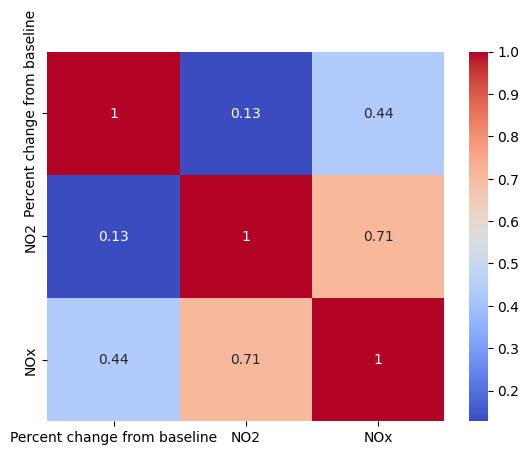

In [10]:
data = pd.read_excel('covid tran.xlsx')

filtered_data = data[data['Sector'] == 'transit stations']
# filtered_data = data[data['Sector'] == 'parks']

sorted_data = filtered_data.sort_values('Date')

df = pd.read_excel('air quality clean.xlsx')
# df = pd.DataFrame(df)
from datetime import datetime
start_date = pd.to_datetime('2021-03-01')
end_date = pd.to_datetime('2022-08-01')
dates = df['Date']
i = 0
x = []
for d in dates:
    x.append(str(d))
    i = i+1
df = df.loc[(pd.to_datetime(x) >=  pd.to_datetime(start_date, utc=True)) & (pd.to_datetime(x) <= pd.to_datetime(end_date,utc=True))]

#Group data by quarter and compute mean NO2 levels
df['Date'] = pd.to_datetime(df['Date']).dt.tz_localize(None)
filtered_data['Date'] = pd.to_datetime(filtered_data['Date']).dt.tz_localize(None)
v1 = filtered_data
v2 = df

# Group the merged DataFrame by date and calculate the correlation between Variable1 and Variable2 for each date
merged_df = pd.merge(v1, v2, on='Date', how='inner')
merged_df['Date'] = pd.to_datetime(merged_df['Date'], format='%Y-%m-%d')
#drop NA
merged_df = merged_df.groupby(pd.Grouper(key='Date', freq='15D')).mean()

merged_df.dropna(subset=['NOx'], inplace=True)
c1 = merged_df['NOx']
c2 = merged_df['Percent change from baseline']
corr = c1.corr(c2)
data_corr = { 'Percent change from baseline': c2,'NO2': merged_df['NO2'],'NOx':c1}
corr2 = pd.DataFrame(data_corr)
corr_2 = corr2.corr()
print(corr_2)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(corr_2, annot=True, cmap='coolwarm')
plt.show()